In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge transactions with customers to get customer profiles
merged_data = transactions.merge(customers, on='CustomerID')

In [4]:
# Create a customer profile DataFrame
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first',  # Assuming region is the same for a customer
    'SignupDate': 'first'
}).reset_index()

In [5]:
# Convert SignupDate to datetime and extract features
customer_profile['SignupDate'] = pd.to_datetime(customer_profile['SignupDate'])
customer_profile['SignupYear'] = customer_profile['SignupDate'].dt.year
customer_profile['SignupMonth'] = customer_profile['SignupDate'].dt.month


In [6]:
# One-hot encode the Region column
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)


In [7]:
# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'SignupYear', 'SignupMonth']])


In [8]:
# Combine scaled features with one-hot encoded regions
final_profile = pd.DataFrame(scaled_features, columns=['TotalValue', 'Quantity', 'SignupYear', 'SignupMonth'])
final_profile = pd.concat([final_profile, customer_profile.drop(columns=['CustomerID', 'TotalValue', 'Quantity', 'SignupDate', 'SignupYear', 'SignupMonth'])], axis=1)


In [9]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
db_index = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(final_profile)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_profile, kmeans.labels_))
    db_index.append(davies_bouldin_score(final_profile, kmeans.labels_))


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

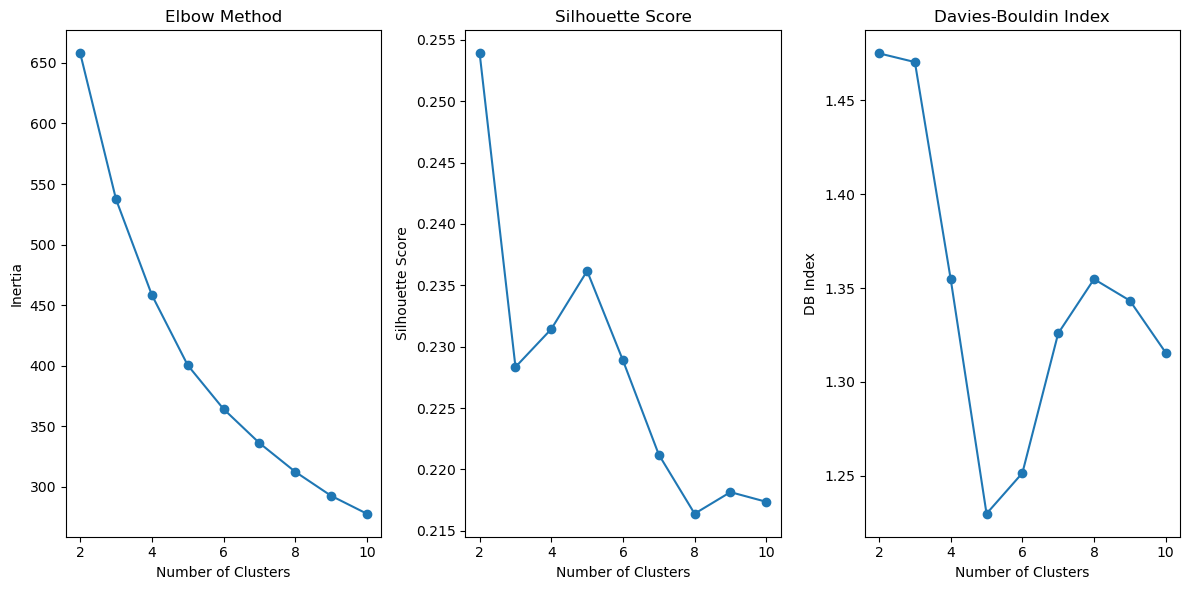

In [10]:
# Plot the Elbow method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), db_index, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

In [11]:
# Choose the optimal number of clusters (for example, let's say 4 based on the plots)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(final_profile)


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Calculate clustering metrics
db_index_value = davies_bouldin_score(final_profile, customer_profile['Cluster'])
silhouette_avg = silhouette_score(final_profile, customer_profile['Cluster'])


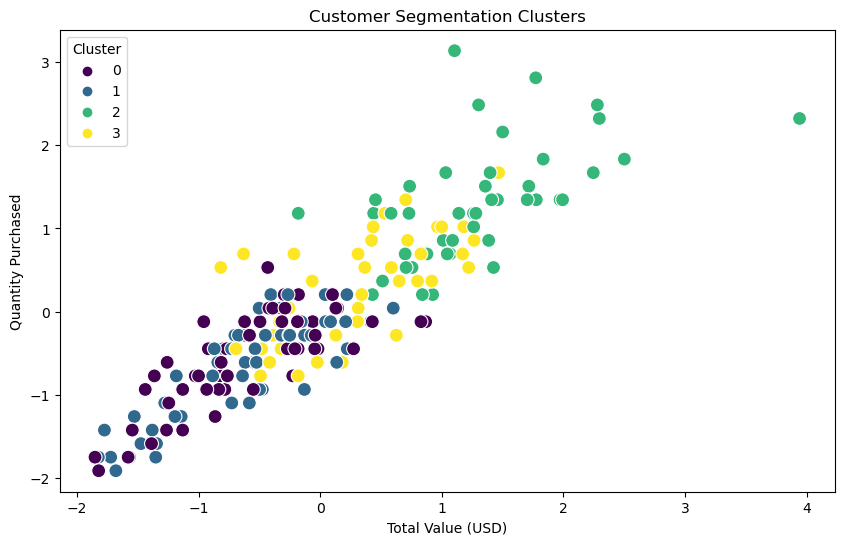

In [13]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_profile['TotalValue'], y=final_profile['Quantity'], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value (USD)')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

In [14]:
# Save clustering results to a CSV file
customer_profile.to_csv('Pakhi_Sharma_Clustering.csv', index=False)

In [16]:
print(f"Clustering results saved to 'Pakhi_Sharma_Clustering.csv'.")
print(f"Number of clusters formed: {optimal_clusters}")
print(f"DB Index value: {db_index_value}")
print(f"Average Silhouette Score: {silhouette_avg}")

Clustering results saved to 'Pakhi_Sharma_Clustering.csv'.
Number of clusters formed: 4
DB Index value: 1.3546551572562917
Average Silhouette Score: 0.2314342884118226
